# Logistic Regression
Logistic regression in R Programming is a classification algorithm used to find the
probability of event success and event failure. Logistic regression is used when the dependent
variable is binary (0/1, True/False, Yes/No) in nature. Logistic regression can be treated as a
special case of linear regression where the outcome variable is categorical and it is part of a
larger class of algorithms known as Generalized Linear Model (glm)

**Mathematically:**
In Linear regression we have 𝑦 = 𝑎0 + 𝑎1𝑥<br>
Then $p = \frac{e^y}{1+e^y}$ is the probability of success.<br>
Since $\frac{p}{1-p}=e^y$ therefore the `logit()` function is given by $ln(\frac{p}{1-p})=y$ logit is the link function for Logistic Regression. This link function follows a sigmoid (shown
below) function which limits its range of probabilities between 0 and 1.
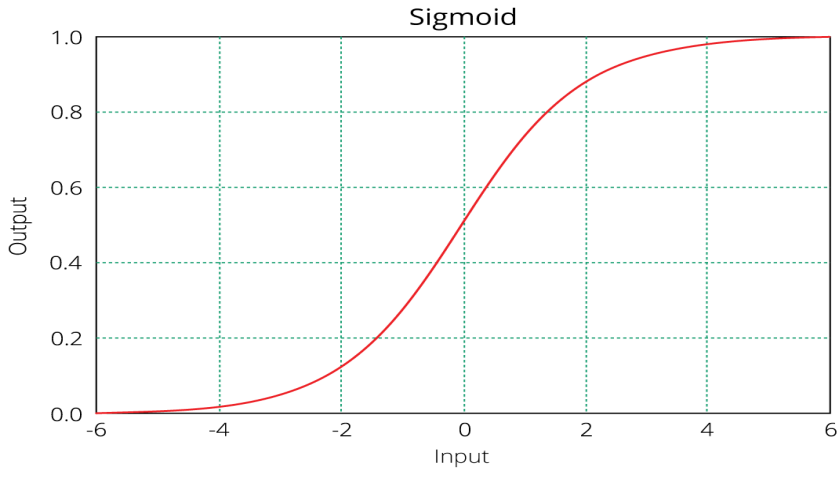

### Types of Logistic Regression
Logistic regression can be divided into following types:
1. **Binary or Binomial:** In such a kind of classification, a dependent variable will have only two
possible types either 1 and 0. For example, these variables may represent success or failure, yes
or no, win or loss etc.
2. **Multinomial:** In such a kind of classification, dependent variable can have 3 or more
possible unordered types or the types having no quantitative significance. For example, these
variables may represent “Type A” or “Type B” or “Type C”.
3. **Ordinal:** In such a kind of classification, dependent variable can have 3 or more
possible ordered types or the types having a quantitative significance. For example, these
variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have
the scores like 0,1,2,3.

### Accuracy of Logistic Regrresion Model
To evaluate the performance of a logistic regression model always look for:
1. **AIC (Akaike Information Criteria):** The analogous metric of adjusted R² in logistic regression is AIC.
AIC is the measure of fit which penalizes model for the number of model coefficients. Therefore, we
always prefer model with minimum AIC value.
2. **Null Deviance and Residual Deviance:** Null Deviance indicates the response predicted by a model
with nothing but an intercept. Lower the value, better the model. Residual deviance indicates the
response predicted by a model on adding independent variables. Lower the value, better the model.
3. **Confusion Matrix:** It is nothing but a tabular representation of Actual vs Predicted values. This helps
us to find the accuracy of the model and avoid overfitting.

### Assumptions of Logistic Regression
1. Logistic regression does not require a linear relationship between the dependent and
independent variables.
2. It requires that the independent variables are linearly related to the log odds.
3. The error terms (residuals) do not need to be normally distributed.
4. Homoscedasticity is not required.
5. The dependent variable in logistic regression is not measured on an interval or ratio scale.

#### Fisher Scoring Iterations.
This is the number of iterations to fit the model. The logistic
regression uses an iterative maximum likelihood algorithm to fit the data. The Fisher method is
the same as fitting a model by iteratively re-weighting the least squares. It indicates the optimal
number of iterations.

### Creating Logistic Regression Model
We use glm() function to create a logistic regression model in R.

In [1]:
#Installing the required packages for the data
install.packages("ISLR")
library("ISLR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#Loading the data
attach(Smarket)
head(Smarket)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [3]:
#Fitting the model
LR=glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family =binomial)

#Summary
summary(LR)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


**Note:** The option family = binomial, tells to R that we want to fit logistic regression. And that
the dependent variable is binary.

### Observations
1. Estimate, standard errors, z-score, and p-values on each of the coefficients. Look like none of
the coefficients are significant here
2. null deviance (the deviance just for the mean) and the residual deviance (the deviance for the
model with all the predictors). There's a very small difference between the 2, along with 6
degrees of freedom.<br>
**Remark:** Evaluation of the Regression. The null deviance and the residual deviance are used to test
whether the independent variables provide statistically significant explanation. A chi-square test, using the
difference between the two residuals, indicates the overall significance of the model.

### Confusion Matrix
The R function table() can be used to produce a confusion matrix in order to determine
how many observations were correctly or incorrectly classified. It compares the observed and the
predicted outcome values and shows the number of correct and incorrect predictions categorized
by type of outcome.<br>
Confusion matrix, proportion of cases<br>
`table(observed.classes, predicted.classes)`

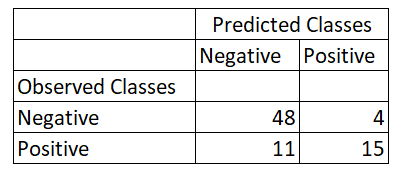

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals
represent incorrect predictions. So, the correct classification rate is the sum of the number on the
diagonal divided by the sample size in the test data. In our example, that is (48 + 15)/78 = 81%.

### Making Predictions using Logistic Regression

**Example: 1**

In [4]:
library("ISLR")
head(Smarket)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [5]:
# Fitting the model 
LGR = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)

# Prediction Probability
Prob = predict(LGR, type="response")

# Predictions
Pred = ifelse(Prob>0.5,"Up","Down")
#Pred is a vector of trues and falses. If PROB is bigger than 0.5, PRED calls "Up"; otherwise, it calls "False".

attach(Smarket)

#Confusion Matrix
table(Pred, Direction)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




      Direction
Pred   Down  Up
  Down  145 141
  Up    457 507

In [6]:
# Attach the data frame Smarket and make a table of PRED, which is the ups and downs from the previous direction.
attach(Smarket)

# Mean of the Predictions i.e. the Prediction Accuracy
mean(Pred==Direction)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




[1] 0.5216

**Observation:**<br>
From the table, instances on the diagonals are where you get the correct classification, and off
the diagonals are where you make mistake. The mean gives a proportion of 0.52 which is
classification rate. The classification prediction accuracy is about 52%. The misclassification
error rate is 48%.

**Example 2:**

In [7]:
#Loading the data
input =  mtcars[c("am","cyl","hp","wt")]

#Fitting the model
LGR = glm(am ~ cyl + hp + wt, data=input, family=binomial)

#Model summary
summary(LGR)


Call:
glm(formula = am ~ cyl + hp + wt, family = binomial, data = input)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8


**Note:** Coefficients. This part of the output shows the coefficients, their standard errors, the zstatistic (sometimes called a Wald z-statistic), and associated P-values. The Z statistics are analogous to the F in the linear regression. For information about P-values

**Observation:** The p-value in the last column is more than 0.05 for the variables "cyl" and "hp",
we consider them to be insignificant in contributing to the value of the variable "am". Only
weight (wt) impacts the "am" value in this regression model.`m

**Example 3:**

In [8]:
# Loading the data
install.packages("TH.data")
library("TH.data")
head(GBSG2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




,horTh,age,menostat,tsize,tgrade,pnodes,progrec,estrec,time,cens
,<fct>,<int>,<fct>,<int>,<ord>,<int>,<int>,<int>,<int>,<int>
1,no,70,Post,21,II,3,48,66,1814,1
2,yes,56,Post,12,II,7,61,77,2018,1
3,yes,58,Post,35,II,9,52,271,712,1
4,yes,59,Post,17,II,4,60,29,1807,1
5,no,73,Post,35,II,1,26,65,772,1
6,no,32,Pre,57,III,24,0,13,448,1


In [9]:
# Fitting the model
fit = glm(cens~pnodes*horTh, data=GBSG2,family=binomial)

# Model summary
summary(fit)


Call:
glm(formula = cens ~ pnodes * horTh, family = binomial, data = GBSG2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7892  -1.0208  -0.7573   1.2288   1.6667  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.55368    0.13942  -3.971 7.15e-05 ***
pnodes           0.08672    0.02172   3.993 6.53e-05 ***
horThyes        -0.69833    0.25394  -2.750  0.00596 ** 
pnodes:horThyes  0.06306    0.03899   1.617  0.10582    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 939.68  on 685  degrees of freedom
Residual deviance: 887.69  on 682  degrees of freedom
AIC: 895.69

Number of Fisher Scoring iterations: 4


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


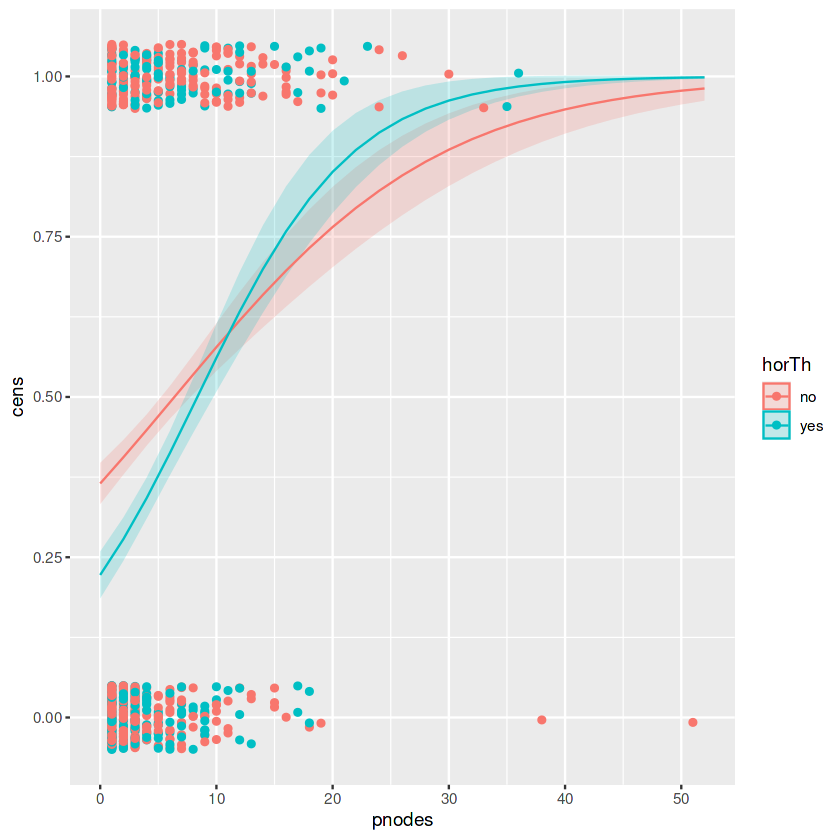

In [10]:
# Visualizing the predictions
library(ggiraphExtra)
ggPredict(fit, se=TRUE, digits=3)
#Set interactive=TRUE for interactive visuals

##### The End